### Looking for trends in snowfall

In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [4]:
f='/project/xprecip/merra2_ncfiles/snow/*.nc'
DS_snow_hourly=xr.open_mfdataset(f,combine='nested',concat_dim='time')
DS_snow_hourly

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 374736)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2021-09-30T23:30:00
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 dask.array<chunksize=(24, 66, 120), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

In [8]:
winter_selected_snow=DS_snow_hourly.isel(time=DS_snow_hourly.time.dt.season.isin(['DJF']))
winter_selected_snow

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 92400)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2022-02-28T23:30:00
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 dask.array<chunksize=(24, 66, 120), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

In [9]:
daily_snowfall_resampled=winter_selected_snow.resample(time='1D').sum(dim='time')
print(daily_snowfall_resampled)

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 15400)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 dask.array<chunksize=(1, 66, 120), meta=np.ndarray>


In [10]:
daily_snowfall_resampled.to_netcdf('/project/xprecip/merra2_ncfiles/snow/daily_resampled/daily_snowfall_winters.nc')

### Daily resampled snowfall

In [12]:
f='/project/xprecip/merra2_ncfiles/snow/daily_resampled/daily_snowfall_winters.nc'
DS_daily_snow=xr.open_dataset(f)
print(DS_daily_snow)

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 15400)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 ...


In [13]:
winter_selected_snow_daily=DS_daily_snow.isel(time=DS_daily_snow.time.dt.season.isin(['DJF']))
winter_selected_snow_daily

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 3850)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 ...

In [14]:
daily_snowfall=winter_selected_snow_daily['PRECSNO']
daily_snowfall

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
[30492000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0

In [16]:
dc_snowfall=daily_snowfall.sel(lat=39,lon=-77,method='nearest')
dc_snowfall

<xarray.DataArray 'PRECSNO' (time: 3850)>
array([5.110618e-08, 1.926985e-08, 2.498376e-08, ..., 1.184596e-07,
       0.000000e+00, 4.168399e-11], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon      float64 -76.88
    lat      float64 39.0

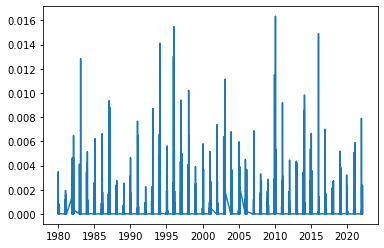

In [17]:
plt.plot(dc_snowfall['time'],dc_snowfall) #units of kg/m^2/s

In [18]:
#boxcar filter for climatology
window=3
rolling_mean=daily_snowfall.rolling(time=window).mean(dim='time')
rolling_mean

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [1.77392212e-05, 1.03161634e-04, 3.22226726e-04, ...,
         5.44717404e-05, 7.33695197e-05, 9.42577244e-05],
        [1.62629003e-04, 7.90397637e-04, 7.48799648e-04, ...,
         2.52195568e-05, 3.60589474e-05, 5.13375671e-05],
        [1.19084725e-03, 1.68327650e-03, 6.02597604e-04, ...,
         1.88914128e-05, 2.56250314e-05, 3.89282359e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.54507870e-05, 9.76061710e-05, 4.89418628e-04, ...,
         2.81852903e-04, 2.59425782e-04, 2.27227269e-04],
        [1.35234790e-04, 9.62718739e-04, 1.03908917e-03, ...,
         5.90839307e-04, 3.83643783e-04, 2.60738481e-04],
        [1.49812060e-03, 2.31088186e-03, 9.40842554e-04, ...,
         4.14781127e-04, 3.10367614e-04, 2.04425873e-04]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0

In [19]:
boxcar_climo=rolling_mean.groupby('time.dayofyear').mean(dim='time')
boxcar_climo

<xarray.DataArray 'PRECSNO' (dayofyear: 92, lat: 66, lon: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00036826, 0.00114067, 0.00163717, ..., 0.00106635,
         0.00101216, 0.00098508],
        [0.00083011, 0.00208097, 0.00202954, ..., 0.00103581,
         0.00101508, 0.00100411],
        [0.00209737, 0.00275594, 0.00115861, ..., 0.00097473,
         0.00094081, 0.00091586]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00031058, 0.0009997 , 0.0015826 , ..., 0.00098299,
         0.00091227, 0.0008684 ],
        [0.0006981 , 0.00187977, 0.0018867 , ..., 0.00095946,
         0.00091553, 0.00089297],
        [0.00192675, 0.00256951, 0.00109368, ..., 0.00087625,
         0.00085398, 0.00084791]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00044702, 0.00129043, 0.00159959, ..., 0.00151576,
         0.00142884, 0.00139083],
        [0.00100149, 0.00180174, 0.00177082, ..., 0.00148377,
         0.00143887, 0.00144116],
        [0.00178677, 0.00213953, 0.00110688, ..., 0.00136596,
         0.00134351, 0.00136521]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [44]:
#grand DJF climo for snowfall
djf_daily_climo_conus=np.nanmean(boxcar_climo,axis=0)
djf_daily_climo_conus

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00034125, 0.00124714, 0.00182054, ..., 0.0007949 , 0.00076569,
        0.00075514],
       [0.00091045, 0.0022974 , 0.00225727, ..., 0.00078567, 0.00076098,
        0.00075142],
       [0.00246541, 0.00312885, 0.0013127 , ..., 0.0007556 , 0.00074447,
        0.00074003]], dtype=float32)

Text(0.5, 1.0, 'DJF Daily Snowfall Climatology')

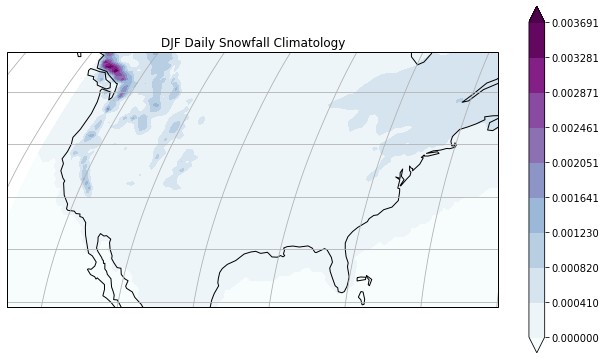

In [48]:
fig = plt.figure(figsize=(11,8.5))
clevs=np.linspace(0,np.nanmax(djf_daily_climo_conus),10)
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(boxcar_climo['lon'], boxcar_climo['lat'], djf_daily_climo_conus[:,:],clevs,transform = ccrs.PlateCarree(),cmap='BuPu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('DJF Daily Snowfall Climatology')

In [49]:
monthly_climo_snow=daily_snowfall.groupby('time.month').mean(dim='time')
monthly_climo_snow

<xarray.DataArray 'PRECSNO' (month: 3, lat: 66, lon: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00036345, 0.00130241, 0.00194066, ..., 0.00082406,
         0.00079688, 0.00078914],
        [0.00098165, 0.00249431, 0.00243912, ..., 0.0007874 ,
         0.00077725, 0.00077344],
        [0.00263551, 0.00339825, 0.00143405, ..., 0.00076441,
         0.00075915, 0.00075581]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00031335, 0.00110462, 0.00156016, ..., 0.00075818,
         0.00073875, 0.00073668],
        [0.00082796, 0.00197945, 0.00192887, ..., 0.00075347,
         0.00072843, 0.00072397],
        [0.00216956, 0.00268523, 0.0011274 , ..., 0.00070918,
         0.00070081, 0.00070817]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00034745, 0.00133695, 0.00196255, ..., 0.00076911,
         0.00073152, 0.00071204],
        [0.00092678, 0.00242724, 0.00240873, ..., 0.00077811,
         0.00074245, 0.0007235 ],
        [0.00260547, 0.00331685, 0.00137727, ..., 0.00075581,
         0.00073997, 0.00072562]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
  * month    (month) int64 1 2 12

In [50]:
jan_climo=monthly_climo_snow.sel(month=1)
jan_climo

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00036345, 0.00130241, 0.00194066, ..., 0.00082406, 0.00079688,
        0.00078914],
       [0.00098165, 0.00249431, 0.00243912, ..., 0.0007874 , 0.00077725,
        0.00077344],
       [0.00263551, 0.00339825, 0.00143405, ..., 0.00076441, 0.00075915,
        0.00075581]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
    month    int64 1

Text(0.5, 1.0, 'Janurary Snowfall Climatology')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


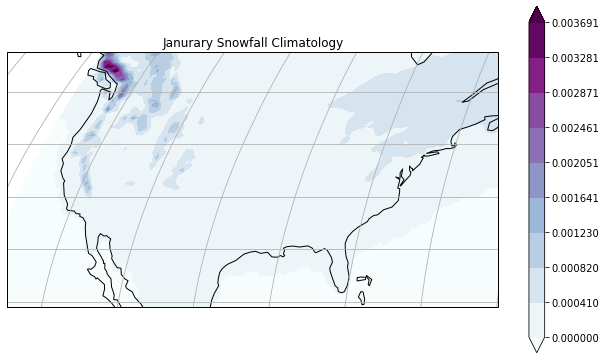

In [51]:
fig = plt.figure(figsize=(11,8.5))
clevs=np.linspace(0,np.nanmax(djf_daily_climo_conus),10)
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(jan_climo['lon'], jan_climo['lat'], jan_climo[:,:],clevs,transform = ccrs.PlateCarree(),cmap='BuPu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Janurary Snowfall Climatology')

In [37]:
dc_climo=boxcar_climo.sel(lat=39,lon=-77,method='nearest')
dc_climo

<xarray.DataArray 'PRECSNO' (dayofyear: 92)>
array([1.05244275e-04, 1.14303060e-04, 2.14452317e-04, 2.59384251e-04,
       2.81479937e-04, 2.41534290e-04, 4.03347629e-04, 5.02414827e-04,
       5.47458010e-04, 3.40137572e-04, 2.61167559e-04, 2.07103309e-04,
       2.32799430e-04, 2.02773008e-04, 1.78109040e-04, 1.71299180e-04,
       2.14359243e-04, 3.05996538e-04, 3.25230911e-04, 3.10960779e-04,
       3.16325488e-04, 3.99443612e-04, 4.88967111e-04, 4.26648650e-04,
       3.46232613e-04, 4.17761417e-04, 3.95353534e-04, 4.46395832e-04,
       2.44924333e-04, 2.88884883e-04, 2.19764101e-04, 2.65064009e-04,
       2.91808392e-04, 3.65001353e-04, 4.44442994e-04, 4.36219008e-04,
       4.54754016e-04, 4.07249463e-04, 3.81852209e-04, 3.29011498e-04,
       2.71007593e-04, 4.69643448e-04, 4.93281404e-04, 6.01776410e-04,
       4.41720884e-04, 4.18979296e-04, 3.76081094e-04, 4.13789268e-04,
       4.33400739e-04, 3.28612543e-04, 1.93721804e-04, 1.79431459e-04,
       2.83907662e-04, 3.91633454e-04, 3.71182221e-04, 3.18317383e-04,
       2.36807071e-04, 1.86248944e-04, 1.57376271e-04, 7.17629300e-05,
       1.17054915e-04, 8.62835732e-05, 3.42209169e-05, 8.21362628e-05,
       1.82765260e-04, 2.20802656e-04, 2.01742965e-04, 1.74019384e-04,
       3.01671505e-04, 2.91724340e-04, 2.61837995e-04, 1.54451787e-04,
       1.57710529e-04, 2.02832482e-04, 2.41874790e-04, 2.68626667e-04,
       2.10353290e-04, 1.95917455e-04, 3.34651326e-04, 3.11020645e-04,
       2.35888103e-04, 9.64573774e-05, 7.78533285e-05, 1.11302317e-04,
       1.09970693e-04, 1.28033673e-04, 1.52237873e-04, 1.84341538e-04,
       1.79460709e-04, 1.56530718e-04, 8.61377994e-05, 1.38901123e-05],
      dtype=float32)
Coordinates:
    lon        float64 -76.88
    lat        float64 39.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

Text(0.5, 1.0, 'Washington, DC Snowfall Climatology (boxcar method)')

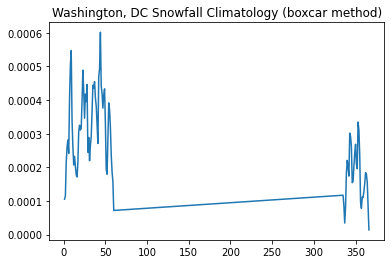

In [38]:
plt.plot(dc_climo['dayofyear'],dc_climo)
plt.title('Washington, DC Snowfall Climatology (boxcar method)') #units of kg/m^2/s or mm/s

In [20]:
#Daily anomalies
daily_snowfall_anoms=daily_snowfall.groupby('time.dayofyear')-boxcar_climo
daily_snowfall_anoms

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-3.0560404e-04, -8.5672387e-04, -7.7434286e-04, ...,
         -9.0004015e-04, -6.7518861e-04, -5.9195561e-04],
        [-6.8814243e-04,  8.5817836e-04,  6.8931887e-04, ...,
         -6.9117441e-04, -7.0752017e-04, -7.4919814e-04],
        [-5.7394477e-04,  5.1141460e-04,  1.3392419e-04, ...,
         -7.4190093e-04, -7.4807816e-04, -8.1475236e-04]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
...
        [-2.2427691e-04, -7.9642655e-04, -4.6953978e-04, ...,
         -8.2320825e-04, -7.1243034e-04, -5.9883803e-04],
        [-3.1445682e-04, -3.4911907e-05,  6.2445179e-07, ...,
         -9.7464037e-04, -8.6776318e-04, -7.7704014e-04],
        [ 8.3918811e-04,  1.4932129e-03,  5.4788002e-04, ...,
         -9.3030126e-04, -8.8060042e-04, -8.3947985e-04]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-2.0974931e-04, -8.0983271e-04, -5.6529639e-04, ...,
         -2.8418208e-04, -3.6027760e-04, -4.7417969e-04],
        [-5.9234956e-04, -8.8075036e-04, -5.0344260e-04, ...,
          6.7628745e-04,  8.0044847e-05, -2.9790914e-04],
        [-6.8858359e-04, -8.7833265e-05,  2.5302172e-04, ...,
          2.3263652e-04, -7.5061689e-05, -4.1889038e-04]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [21]:
#save anomalies to a netcdf file
daily_snowfall_anoms.to_netcdf('/project/xprecip/merra2_ncfiles/snow/daily_resampled/anomalies/daily_snowfall_anoms.nc')

### Normalized Anomalies

In [26]:
snowfall_anoms_std=daily_snowfall_anoms.std(dim='time')
snowfall_anoms_std

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00075984, 0.00240216, 0.00257868, ..., 0.00144436, 0.00133252,
        0.00130894],
       [0.0019899 , 0.00312458, 0.00290811, ..., 0.00140686, 0.0013094 ,
        0.00127689],
       [0.00330443, 0.00387275, 0.00156127, ..., 0.00132768, 0.00127054,
        0.00124472]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0

In [28]:
snowfall_anoms_norm=daily_snowfall_anoms/snowfall_anoms_std
snowfall_anoms_norm

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-4.02195036e-01, -3.56647253e-01, -3.00286770e-01, ...,
         -6.23139322e-01, -5.06699979e-01, -4.52238798e-01],
        [-3.45817626e-01,  2.74654180e-01,  2.37033233e-01, ...,
         -4.91288066e-01, -5.40339530e-01, -5.86734712e-01],
        [-1.73689395e-01,  1.32054642e-01,  8.57788771e-02, ...,
         -5.58795571e-01, -5.88789463e-01, -6.54566228e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
         -5.69945037e-01, -5.34648240e-01, -4.57496792e-01],
        [-1.58026457e-01, -1.11733191e-02,  2.14727654e-04, ...,
         -6.92776203e-01, -6.62718534e-01, -6.08539164e-01],
        [ 2.53958374e-01,  3.85569125e-01,  3.50918949e-01, ...,
         -7.00697601e-01, -6.93093717e-01, -6.74432158e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-2.76043892e-01, -3.37126851e-01, -2.19219476e-01, ...,
         -1.96752369e-01, -2.70372808e-01, -3.62261027e-01],
        [-2.97678083e-01, -2.81878173e-01, -1.73116729e-01, ...,
          4.80706394e-01,  6.11309707e-02, -2.33307600e-01],
        [-2.08381832e-01, -2.26798169e-02,  1.62061229e-01, ...,
          1.75220504e-01, -5.90787642e-02, -3.36533546e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [29]:
### Also save normalized anomalies
snowfall_anoms_norm.to_netcdf('/project/xprecip/merra2_ncfiles/snow/daily_resampled/anomalies/norm_snowfall_anoms.nc')

In [22]:
#Anomalies
f='/project/xprecip/merra2_ncfiles/snow/daily_resampled/anomalies/daily_snowfall_anoms.nc'
DS_anoms_snow=xr.open_dataset(f)
DS_anoms_snow

<xarray.Dataset>
Dimensions:    (lat: 66, lon: 120, time: 3850)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 ...
Data variables:
    PRECSNO    (time, lat, lon) float32 ...

In [23]:
snow_anoms=DS_anoms_snow['PRECSNO']
snow_anoms

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
[30492000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [24]:
dc_anoms=snow_anoms.sel(lat=39,lon=-77,method='nearest')
dc_anoms

<xarray.DataArray 'PRECSNO' (time: 3850)>
array([-0.000105, -0.000114, -0.000214, ..., -0.000237, -0.000186, -0.000157],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon        float64 -76.88
    lat        float64 39.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

Text(0.5, 1.0, 'Snowfall Anomalies for Washington, DC')

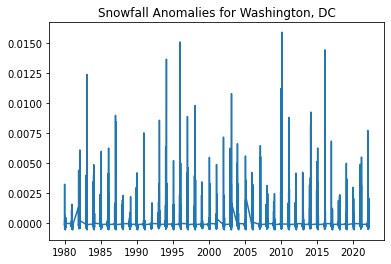

In [34]:
plt.plot(dc_anoms['time'],dc_anoms)
plt.title('Snowfall Anomalies for Washington, DC')

In [30]:
f='/project/xprecip/merra2_ncfiles/snow/daily_resampled/anomalies/norm_snowfall_anoms.nc'
DS_norm_snow=xr.open_dataset(f)
DS_norm_snow

<xarray.Dataset>
Dimensions:    (lat: 66, lon: 120, time: 3850)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 ...
Data variables:
    PRECSNO    (time, lat, lon) float32 ...

In [31]:
norm_snow_anoms=DS_norm_snow['PRECSNO']
norm_snow_anoms

<xarray.DataArray 'PRECSNO' (time: 3850, lat: 66, lon: 120)>
[30492000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon        (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat        (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [32]:
dc_norm=norm_snow_anoms.sel(lat=39,lon=-77,method='nearest')
dc_norm

<xarray.DataArray 'PRECSNO' (time: 3850)>
array([-0.094893, -0.103093, -0.19343 , ..., -0.213512, -0.168011, -0.141966],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon        float64 -76.88
    lat        float64 39.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

Text(0.5, 1.0, 'Normalized Snowfall Anomalies for Washington, DC')

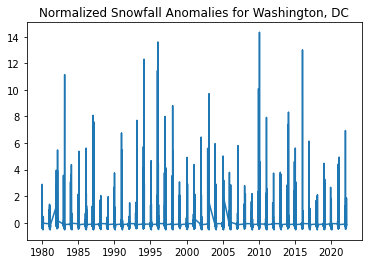

In [36]:
plt.plot(dc_norm['time'],dc_norm)
plt.title('Normalized Snowfall Anomalies for Washington, DC')